In [1]:
from sklearn.datasets import load_sample_images
from sklearn.metrics import f1_score as f1,accuracy_score as acc
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from utilidades import my_tokenizer
from keras.utils.vis_utils import plot_model

# Aprendiendo el orden  con CNNs


El significado de un documento no está solamente en las palabras en sí, sino también en el orden, la combinación y la relación espacial entre cada una de las palabras que lo componem. El significado también depende de la intención y la emoción que forma cada combinación particular de palabras. 
Comprender la intención de un mensaje es una habilidad fundamental para un oyente o lector, emocionalmente inteligente o lector de lenguaje natural, ya sea humano o artificial. Para poder tener una mejo comprensión del significado  deberíamos pode medir el significado de las combinaciones de palabras mediante una estrategia más flexible que el recuento de $n$-gramas. Esta estragía debería permitir identificar a partir de una secuencia de palabras características como: `significado, emoción, información semántica latente`.

Existen sistemas que pueden leer o generar texto escrito. Sin embargo, las máquinas pueden solo  "transmitir" el mensaje pero no lo hacen con el tono, la fluidez, o como lo esperarias de una persona persona exprese incluso en tareas muy básicas. A medida que una persona se comunica, subyacen patrones de texto y habla que tienen un gran efecto  con gran efecto en como percibimos los mensajes. La carencia de eso patrones es la razón por la que el texto producido por máquina tiende a parecer deficiente. 

Recientemente, el PNL ha sido principalmente enfocado en el uso de redes neuronales. Con lo cuál han proliferado las herramientas de código abierto desarrollado y mantenido por importantes empresas TI como Google y Facebook. Esto es debido a la capacida que tienen las redes neuronales para encontrar patrones en grandes  conjuntos de datos. El perceptrón se convirtió rápidamente en la red feedforward (un perceptrón multicapa), con esto aparecieron multiples variantes como son las: `redes neuronales convolucionales, recurrentes` con las que se pueden incrementar las capacidades de aprendizaje/descubirmiento  de patrones en  grandes colecciones de datos. Aunque el propósito original de las redes neuronales aprender a cuantificar la entrada para realizar tareas de clasificación y regresión (por ejemplo análisis de tópicos, análisis de sentimiento), ahora ya también ser utilizan generar texto, traducir frases a otro idiomas, generar respuestas a preguntas nunca antes vistas, e incluso generar nuevo texto basado en el estilo de un autor en particular.

## El orden y la distancia importan

La naturaleza de las palabras en un texto no solo la define el significado indvidual de cada una de ellas, si no también la relación que guardan entre sí. Esa relación se puede expresar de las formas:

- **orden** las siguientes dos sentiencias  aún cuando tiene las mismas palabras no significan los mismo:
    - `Juan ama a Petra`
    - `Petra ama a Juan`  
- **distancia/proximidad** en la siguiente oración el verbo `deshizo` al final se aplica al sustantivo `grito` del inicio de la misma
    - `El grito se vino rebotando por los paredones de la barranca y subió hasta donde estábamos nosotros. Luego se deshizo.`

Las relaciones (orden y proximidad) pueden explorarse en busca de patrones dos formas: `espacial` y `temporal`. La diferencia es que cuando se hace de forma espacial, se examina la sentencia como si estuviera escrita en una página, es decir se buscan relaciones en la posición de las palabras. Mientras que cuando se hace de forma temporal, para la exploración los datos se transforman en series de tiempo. Las dos formas están estrechamente relacionadas, pero son diferentes en como se procesan los documentos para general las entradas cada tipo de red. Por un lado los datos espaciales se procesan mediante una ventana de ancho fijo; mientras que las series de tiempo pueden extenderse por una cantidad indefinida de tiempo.

En las redes tradicionales, los patrones que se descubren describen una relación con partes de la entrada mediante el uso de los pesos en las diferentesa capas. Y no cuentan con un mecanismo que capture las relaciones espacial/temporal entre tokens. Las dos opciones más ampliamente utilizadas para el procesamiento del lenguaje natural en la actualidas son las redes neuronales convolucionales y las redes neuronales recurrentes.
En la siguente figura, se muestra una red tradicional con una capa oculta. En la entrada se utiliza un token/palabra. Y cada neurona de la capa de entrada está conectada a todas las neuronas de la capa oculta (red completamnete conectada) y con su peso asosciado. 

| |
|:----:|
|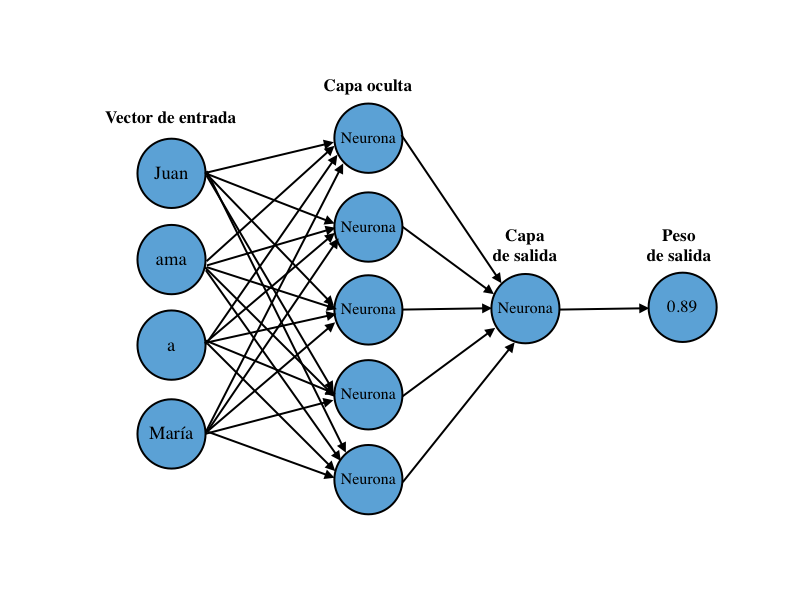|
|**Red feedfordward completamente conectada**|

La entrada de la red neurolan son vectores. Los vectores que utilizaremos serán los ya vistos: **one-hot-encoding** o bien los **word embeddings** (i.e. Word2Vec, FastText y Glove). Los **one-hot-encoding** serían un vector del tamaño del vocabulario, y la codificación para cada palabras contendrá un 1 en la posición de esa palabra que está codificando. En el cado de los **word embeddings** las implementaciones de `gensim` producen vectores densos por palabra y podemos usar modelos pre-entrenados.

Es muy probable que si se cambia el orden de la entrada `Juan ama a María` a `María ama a Juan` en la entrada de la red, se obtendra un peso diferente. Eso derivado de que cada posición de entrada está asociada con un peso específico dentro de la capa oculat ($x_1$ está  aosciado a $w_1$, $x_2$ está asociado a $w_2$, y así sucesivamente).

Aún así una red tradidional puede aprender las relaciones para cada combinación de entrada. Pero conforme las oraciones crencen el problema se vuelve intratable. Esto que para cada combinación se deben considerar todos los pares, triples, etc  posibles en todas las posiciones posibles para cada término.

## Keras

Posiblemente  dos de las principales herramientas implementar diferentes arquitecturas de redes neuronales son `Theano`(http://deeplearning.net/software/theano/) y `TensorFlow` (http://www.tensorflow.org). Aunque ambos están implementados  en C,  también ambos cuentan con wrappers para Python. También vale la pena mencionar  `PyTorch` (http://pytorch.org/) de Facebook, la cual está implentada en un modulo de Lua llamado Torch; `PyTorch` también cuanta con API wrapper para Python. Derivado de que todas las herramientas son implementaciones abstractas que permiten construir modelos desde cero; han aparecido una gran variedad de  bibliotecas para facilitar el uso de estas arquitecturas subyacentes. Por ejemplo: `Lasagne` para Theano, `Skflow` para TensorFlow. En nuestro curso  utilizaremos  `Keras` (https://keras.io/), esta ultima  tiene la ventaja de que puede usar TensorFlow o Theano como su backend. Además su API es amigable y versatilidad. `Keras` requiere del module `h5py` para guardar el estado de un modelo ya entrenado. 

TensorFlow es el backend por defecto de `Keras`. Esto se puede cambiar mediante un archivo de configuración, una variable de entorno o en el script donde se usa. En cualquiere caso simpre puede consultar la do documentación(https://keras.io/getting_started/). En nuestro curso las inteface que más utilizaremos son: la clase  `Sequential()`, la cuál es una abstracción de la red neuronal que le brinda acceso a la API de Keras, mediante la cual podremos compillar (`compile`) y ajustar nuestos modelos (`fit`). Al compilar se calculam los errores de entrenamiento y el ajusto realiza la propagación hacia atras (backpropagation). Algunos de los hiperpárametros que requieren del ajustos so el número de epocas (epochs), el tamaño del  batch (batch_size) y el optimizador (optimizer).

El ajuste de una modelo y el diseño de una arquitectura para una red neuronal, dependerá en gran medida de  intuición del desarrollador y de la aplicación en particular. Por lo que es usual partir de una implemtación ya probada para un problema similar, y solo realizar ajustes para el problema actual. Dado que las redes neuronales convolucionales han sido ampliamente utilizadas en problemas de  clasificación de imágenes y reconocimiento de objetos, aprovechando su intima relación con el álgebra lineal, específicamente la multiplicación de matrices, para identificar patrones dentro de una imagen (las cuales naturalmente se expresan como matrices). Primero utilizaremos el procesamiento de imágenes para introducir los conceptos relacionadoa a  las redes neuronale convolucionales.

## Redes Neuronales Convolucionales (CNN)

Las redes neuronales convolucionales (del inglés Convolutional Neural Network), reciben su nombre del concepto de deslizar (o convolucionar) una ventana sobre la muestra de datos. Las convoluciones aparecen en muchos lugares de las matemáticas, usualmente relacionadas con temas de series de tiempi. El concepto clave es visualizar una ventana deslizante sobre una señal.

| |
|:---:|
|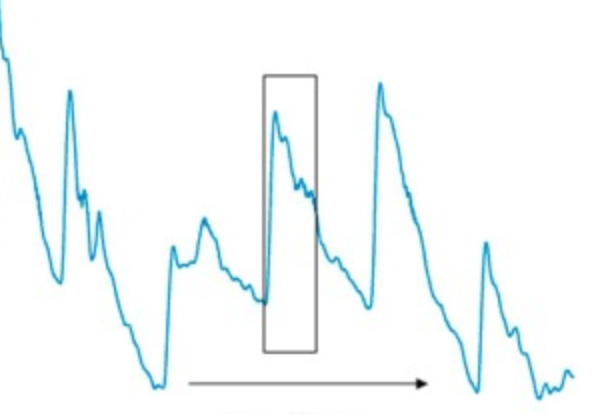|
|**Ventana deslizante**|

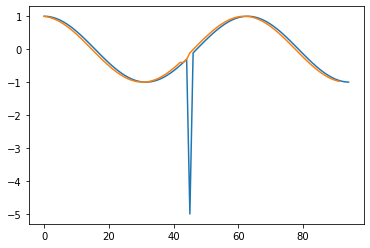

In [2]:
### Filtro de mediana
x=np.arange(0, 3*3.1416, 0.1)
y=np.cos(x)
y[45]=-5
plt.plot(range(len(x)),y)
st=1
ks=3
y1=[np.median(y[i:i+ks]) for i in range(0,len(y)-ks,st)]
plt.plot(range(len(y1)), y1)

Esa misma ventana puede aplicarse a una secuencia de texto. La idea es deslizar un ventana que solo nos permite ver una porción de los  datos en un conjunto más grande. 

### Convoluciones e imagenes

Las redes neuronales convolucionales se popularizaron en tareas de procesamiento y el reconocimiento de imágenes. Una CNN captura relaciones espaciales entre los pixeles de cada muestra, con esto es posible determinar si una imagen contiene un objeto determinado por ejemplo un vehículo, un gato o 
un mono con cuchillo.

| |
|:--:|
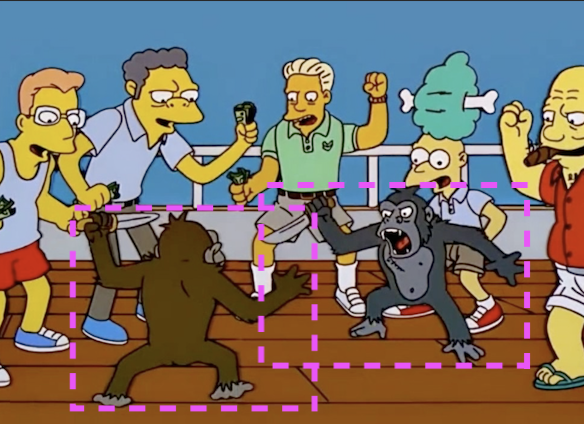
|**Detección de objetos**|

Una red convolucional (`convnet`), a diferencia de una red tradicional que discrimina asignando un peso a cada elemento (cada píxel de una imagen), una CNN define un conjunto de filtros (kernels/núcleos) que se deslizan sobre la imagen (una convolución). En imágenes blanco y negro, cada pixel es representado como un 1 (blanco/activado)o un 0 (negro/desactivado. En el caso de un imagen en escala de grises cada pixes puede ser representado como un valor flotante entre 0.0 y 1.9, y en una imagen RGB seria un tripleta con la intensidad de cada uno de los canales.

In [3]:
dataset = load_sample_images()
im_rgb=dataset.images[0]

(427, 640, 3)


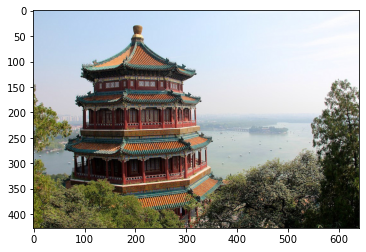

In [4]:
#Imagen a color de 427x649 pixeles en tres canales
print(im_rgb.shape)
plt.imshow(im_rgb)

In [5]:
np.max(im_rgb)

255

(427, 640)


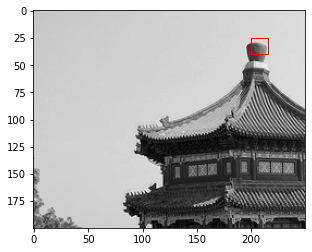

In [6]:
#Convertir a escala de grises Gi = 0.2989 Ri + 0.5870 Gi + 0.1140 Bi 
im_gray=np.dot(im_rgb[...,:3]/255, [0.2989, 0.5870, 0.1140])
#Matriz de 427x640
print(im_gray.shape)
plt.imshow(im_gray[0:200,0:250],cmap=plt.get_cmap('gray'), vmin=0, vmax=1)
rectangle = plt.Rectangle((200,25), 15, 15, facecolor="none", ec="r")
plt.gca().add_patch(rectangle)

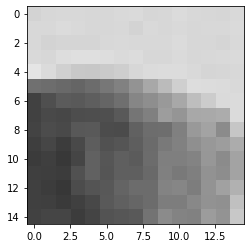

In [7]:
#Podemos ver una ventana de 15 pixeles
plt.imshow(im_gray[25:40,200:215],cmap=plt.get_cmap('gray'), vmin=0, vmax=1)

In [8]:
#Su matriz correspondiente a sus primeros 5 pixeles
pd.DataFrame(im_gray[35:40,210:215]).round(2)

,0,1,2,3,4
0,0.50,0.52,0.59,0.55,0.64
1,0.48,0.50,0.57,0.55,0.64
2,0.53,0.49,0.58,0.63,0.69
3,0.49,0.53,0.57,0.56,0.75
4,0.51,0.51,0.61,0.58,0.78


Cada filtro(kernel) que se defina se  convolucionará o se deslizará sobre los datos de entrada. Puede pensar en ello como una serie de instantáneas. Donde cada instantánea es procesada, despues deslizamos la ventana un poco y se vuelve a procesar. Este proceso de deslizamiento es lo que perminte que las redes neuronales convolucionales sean altamente paralelizables. Dado que cada ventana es una muestra que puede calcularse independiente de todas las demás. Es decir, no es necesario esperar a que se calcule la primera ventana para calcular la siguiente.

El tamaño de la ventana del filtro es un parámetro que debe definir quien diseñe el modelo y depende en gran medida del contenido de los datos. En problemas realcionados con imágenes, normalmente se utiliza un tamaño de ventana de tres por tres píxeles. En las secciones posteriores discutiremos un poco los tamaños para los problemas relacionados a PLN. 

#### Tamaño del paso 

El tamaño del paso o **stride** el parámetro que define el tamaño del desplazamiento entre dos ventanas sucesivas. Este valor casi nunca es tan grande como el filtro. Cada ventana suele superponerse con la vecinas (traslape). La distancia que "recorre" cada convolución se conoce como **stride** y, por lo general, se establece en 1 (o al menos menor que  el ancho del filtro). Lo anterior debido a que un paso más en el que no haya traslape el filtro perderá el efecto de "desenfoque" en el píxel/token relacionado con sus vecinos.
Esta superposición tiene algunas propiedades interesantes, que se harán evidentes a medida que vea cómo evolucionan los filtros con el tiempo. 

#### Composición del kernel

Hasta ahoras solo se ha descrito el proceso del deslizamiento y de la ventana, pero no se ha definido en que consiste el procesamiento que el filtro aplica a cada ventana.
Un kernel/filtro se componen de dos elementos:

- Un conjunto de pesos (exactamente como los pesos de las neuronas)
- Una función de activación

Usualmente los filtros son cuadrados pero también pueden tener otras formas. Los filtros se pueden ver como un conjuto de neuroras de filtrado (similares a las neuronas de la capa oculta), excepto que los pesos son fijos para todo el barrido de la entrada.


A medida que cada filtro se desliza sobre la imagen. Los valores de los píxeles en cada ventana se multiplican por el peso asociado con la posición que le corresponde dentro del filtro. Suponga que se está utilizando un filtro de $3\times3$. Se comienza en la esquina superior izquierda la pimera ventana tomará el primer píxel (0, 0) por el primer peso (0,0), luego el segundo píxel (0, 1) por peso (0, 1), y así sucesivamente.
Los productos de píxel y peso de toda la ventana se suman y se pasan a la función de activación (usualemente una ReLU rectified linear units). 


| |
|:--:|
|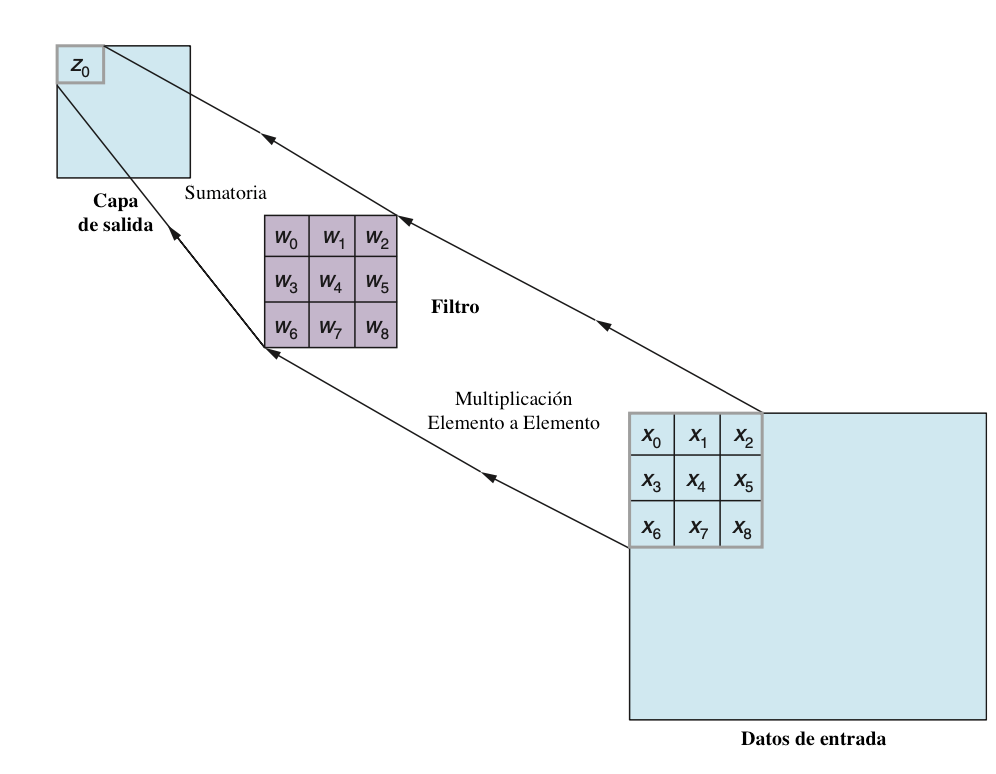|
|** Una iteración de una Red Neuronal Convolucional **|

En la figura anterior para una imagen cada  $x_i$ es el valor del píxel en la posición $i$ y $z_0$ es la salida de una función de activación de ReLU ($z_0 = \max (\sum_{i=0}^{8} (x_i * w_i), 0)$ o $z_0 = \max ( (x_i * w_j), 0)$. La salida de esa función de activación se registra como un valor posicional en una "imagen" de salida. El filtro se desliza un paso, toma la siguiente ventana y calcula el siguiente valor de salida. Este es concatenado a la salida (ver la figura siguiente).

| |
|:--:|
|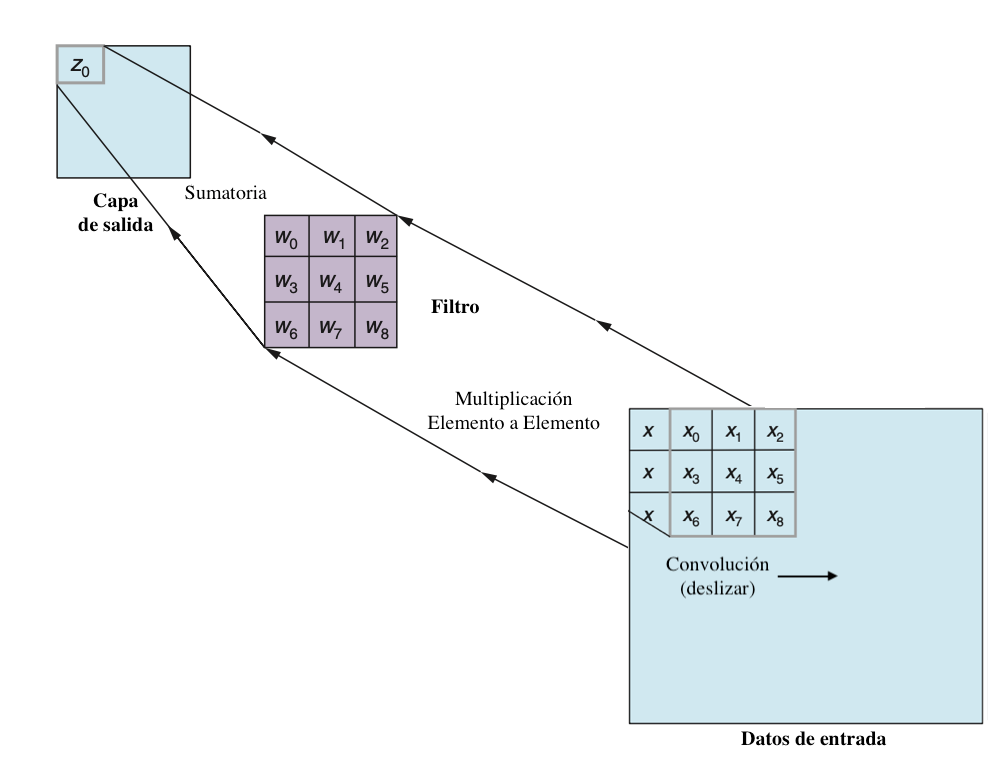|
|**Convolución**|

Se aplican muchas convoluciones en cada capa y, a medida que cada capa procesa la imagen completa, se genera una nueva "imagen", una imagen "filtrada". Si se tienen $n$ filtros. Al final del proceso se obtendrán $n$ nuevas imágenes para cada filtro que se haya definido. En las secciones posteriores revisaremos que se hace con las  $n$ imagenes generadas. 

| |
|:--:|
|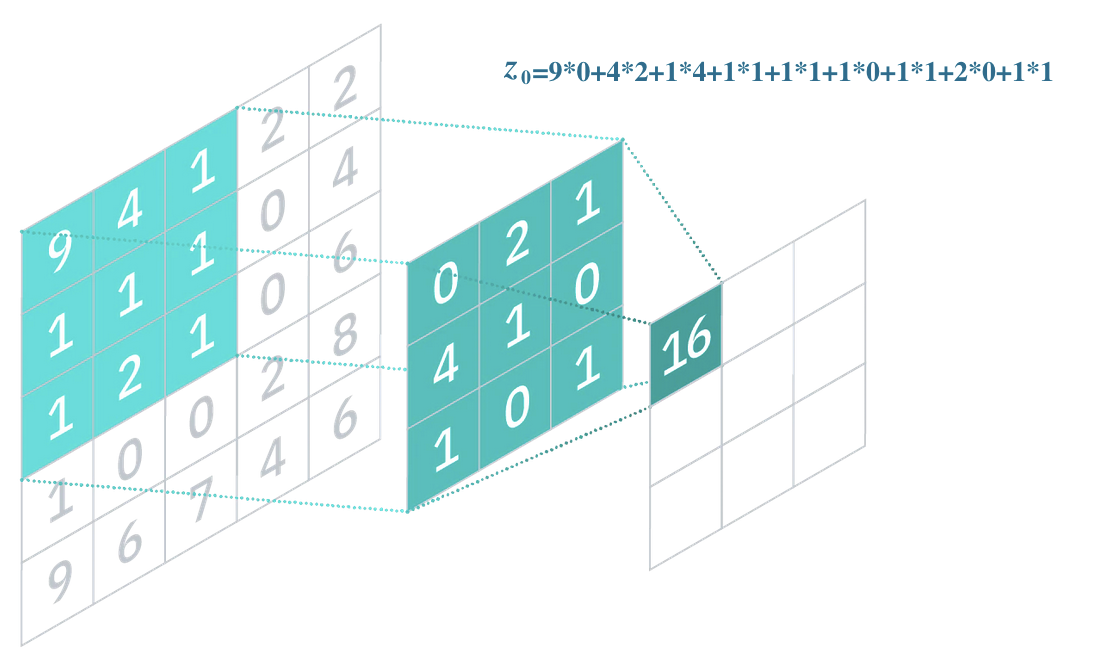|
|**Convolución ejemplo númerico**|

### Completado de bordes (padding)

Si se utiliza un filtro de $3\times 3$  y se desplaza un píxel a la vez, el proceso se tendrá que detener cuando el borde más a la derecha del filtro cubre el píxel más a la derecha de la entrada, por lo tanto la salida será una imagen con dos píxeles de ancho que que la entrada. Keras tiene estrategías para lidiar con este problema. La primera es simplemente ignorar que la salida es menor. Solo debemos proporcionar el parámetro  `padding = 'valid'`. Si este es el caso, solo debe tener cuidado y diseñas las arquitectura de tal forma que ni hay problemas con las dimensiones a medida que los datos a las capas siguientes. La desventaja de esta estrategia es que los datos en el borde de la entrada original se submuestrean ya que los puntos interiores se pasan a cada filtro varias veces, dados los traslapes en las ventatnas. En una imagen grande, esto puede no ser un problema, pero en Tweet, submuestrear una palabra al comienzo de un conjunto de datos de 10 palabras podría afectar drásticamente el resultado. 

La siguiente estrategia se conoce como `padding`, que consiste en agregar suficientes datos en los bordes externos de la entrada para que el primer punto de datos real se trate de la misma forma que los puntos internos. La desventaja de esta estrategia es que al agregar datos potencialmente no relacionados a la entrada puede sesgar el resultado. Después de todo, nada le impide a la red encontrar patrones en los datos falsos que se agregaron. Es posible completar la entrada de varias formas diferentes para tratar de minimizar los efectos adversos.

In [9]:
from keras.models import Sequential
from keras.layers import Conv1D

In [10]:
modelo = Sequential() # instanciamos Sequential

In [11]:
w,h=(427, 640)# supongamos el tamaño de la imagen de la pagoda
modelo.add(Conv1D(filters=16, 
                     kernel_size=3, # tamaño del filtro
                     padding='same',  # las opciones son 'same' o 'valid'
                     activation='relu', # Funcion de activacion
                     strides=1, #Tamaño del desplazamiento
                     input_shape=(w, h) # Como asumimos el mismo tamaño, el padding se maneja internamente
                )
          )

Aún no nos preocupamos por los detalles de implementación, el listado anterior solo es un ejemplo que muestra como el uso de Keras simplifica un problema que en principio podría complicado. Hay más estrategias en las que el preprocesador intenta adivinar cuál debería ser el patrón de completado, imitando los de datos que ya están en el borde. Pero dado que esas estraegía no resultan de utilidad en problemas de PLN, no las revisaremos aquí. 

###  Aprendizaje mediante Convoluciones

Como ya mencionamos en una CNN con $n$ filtros se produce $n$ nuevas imágenes. Una opción es pasar Puede pasar estas imágenes filtradas a una segunda capa convolucional con su propio conjunto de filtros. En la práctica, esta es la arquitectura más común. El resultado de encadenar múltiples capas de convoluciones induce un camino para aprender diferentes niveles de abstracción: primero bordes, luego formas/colores y, finalmente conceptos.

Independiente al número de capas, una vez que se obtiene la salida final, se procede a calcular el error y propagarlo. Como las funcines de activación utilizada es diferenciable, es posible hacer la propagación hacia atras actualizar los pesos de los filtros individuales. Con esto la red puede aprender qué tipo de filtros necesita para producir la salida correcta para una entrada determinada. Podemo decir que mediente este proceso se aprende a detectar y extraer información útil para las capas posteriores. 

Para propagar hacia atrás el error, hay que tomar la derivada del error con respecto al peso de entrada.
Y como la capa de convolución aparece antes en la red, es específicamente la derivada del gradiente de la capa de arriba con respecto al peso a la entrada. Este cálculo es similar a la propagación hacia atrás tradicional porque el peso generó salida en muchas posiciones para una muestra de entrenamiento dada.
No trataremos las derivaciones específicas del gradiente con respecto a los pesos de un filtro convolucional. Una forma simple de pensarlo es que para un peso dado en un filtro dado, el gradiente es la suma de los gradientes normales que se crearon para cada posición individual en la convolución durante el pase hacia adelante. Lo anterior se sumariza en la siguiente función:

| |
|:--:|
||
|$$\frac{\partial E}{\partial w_{ab}}=\sum_{i=0}^n\sum_{j=0}^m \frac{\partial E}{\partial x_{ij}}\frac{\partial x_{ij}}{\partial w_{ab}}$$|
|**Suma de los gradientes para un filtro**|

Este proceso es similar al de una red  tradicional feedforward, en la que se calcula cuánto contribuyó cada peso al error general del sistema. Luego, se ajusta para reducir el error en los ejemplos de entrenamiento futuros. Ninguno de estos detalles es vital para comprender el uso de redes neuronales convolucionales en el procesamiento del lenguaje natural. Pero el concepto ayuda a tener una intuición sobre cómo modificar la arquitectura de las redes. 

## Ventanas en secuencias de texto

Revisamos conceptualmente el proceso utilizado para entrenar una red CNN con imagenes, los cual es relativamente directo dada la semejanza de una imagen y una matriz. Pero que para cuando hablamos de documentos de texto. Como seguramente estarás suponiendo, en este caso utilizaremos lo vectores de palabras, que hemos estado aprendiendo. En el caso del texto las relaciones verticales relativas entre palabras serían dependientes del ancho de la página, por lo que se presupone que no pueden surgir patrones en esa orientación. Por otro , lado la información relevante estaría en las posiciones “horizontales" relativas. 

Con este efonque solo son de interés las relaciones espaciales horizontales. Es decir, el filtro bidimensional que utilizabamos sobre una imagen, se reemplaza por un filtro unidimensional que hará convoluciones sobre una sentencia escrita de una sola dimensión como una oración. En la siguiente imagen se muestran los filtros de tamaño 3 par la sentencia `pepe pecas pica papas con un pico`.

| |
|:--:|
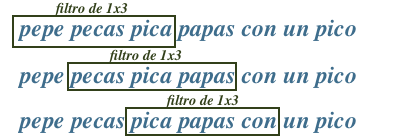
|**filtro horizontal en texto**|

Si vemos el vector como una imagen, la segunda dimensión estaría dada por la longitud completa del vector palabras,(entre 100 y 300 cuando usamos wordembedding y varias decenas de miles para los one-hot encoding). Con está consideración solo debemos determinar el ancho del filtro. Por ejemplo para la figura anterios suponiendo que tenemos vectores de de dimensión 5 para cada palabra, la convolución quedaría como se muestra en la siguiente figura:

| |
|:--:|
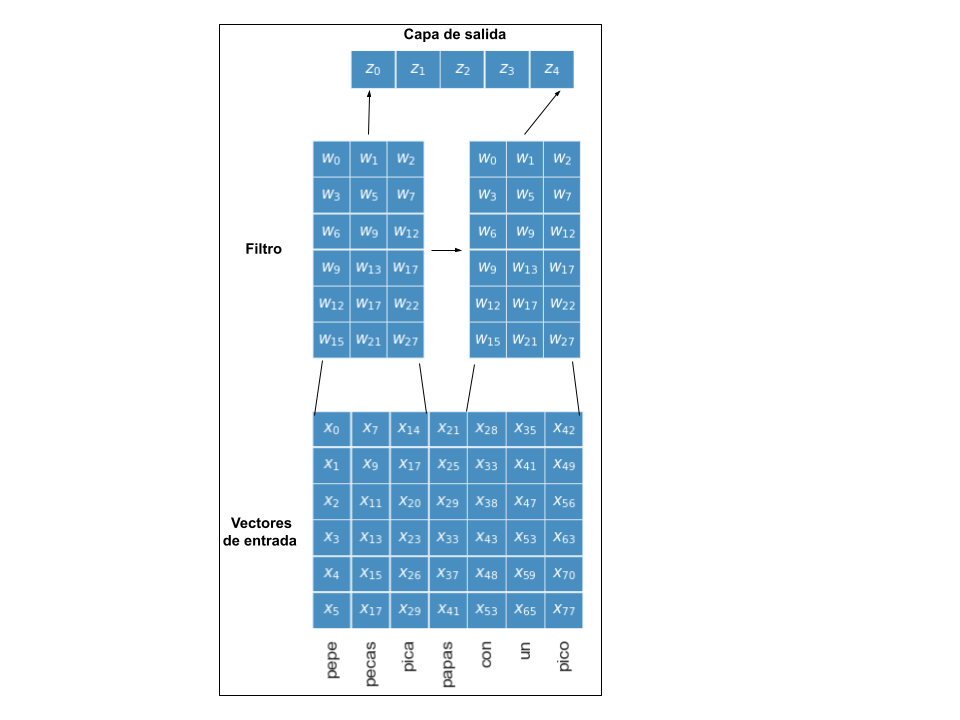
|**Convolución en una dimensión utilizando word embeddings**|

Note que la dimensión a la que nos referimos cuando decimos convolución unidimensional es el "ancho" de la frase: la dimensión por la que se desplaza el filtro. Mientras que en una convolución bidimensional, la imagen se recorred de lado a lado y de arriba a abajo, de ahí el nombre bidimensional. Aquí solo se desliza en una dimensión, de izquierda a derecha. 

Los pesos en los filtros no cambian para una muestra de entrada dada durante  la propagación adelante, lo que significa que puede tomar un filtro dado y todas sus ventanas y calcular la salida en paralelo. Este es lo que hacer que uan CNN se "rápida". Y esta velocidad, más su capacidad para ignorar la posición de una característica, es la razón por la que las redes cconvolucionales son ampliamente utilizadas para la extracción de características. 

### Preparando los datos

Ahora utilizaremos  Keras para clasificar los tweets de humor, pero para ello primero tenemos que perparalos para introducirlos en nuestra red convolucional. Comenzaremos importando algunas librerias

In [12]:
# Utilidad para manejar el padding
from keras.preprocessing import sequence
# el modelo de la red
from keras.models import Sequential, Model
# las diferentes tipos de capas y objetos que vamos a encadenar
from keras.layers import (Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D,
                          Flatten, Embedding,Input, concatenate)

In [13]:
# cargamos los tweets de humor
train_df=pd.read_csv('data/humor/train_english.tgz', compression='gzip',usecols=['is_humor','text'])
test_df=pd.read_csv('data/humor/dev_english.csv',usecols=['is_humor','text'])
train_df=train_df.dropna().astype({'is_humor': 'int32'})
test_df=test_df.dropna().astype({'is_humor': 'int32'})

In [14]:
train_df.columns

Index(['text', 'is_humor'], dtype='object')

In [15]:
import gensim.downloader as api
# Ver los modelos disponibles en gensim-data
print('\n'.join(list(api.info()['models'].keys())))

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [ ]:
#Usaremos los de glove de dimension 25 por que es el más pequeño
word_vectors= api.load('glove-twitter-25')
#word_vectors= api.load('glove-twitter-200')

In [ ]:
#Implementamos un shortcut para vectorizar cada sentencia el conjunto de datos
def vectorize_dataset(docs, tokenizer=my_tokenizer):
    data_vectors=[]
    for tw in docs:
        tokens=my_tokenizer(tw)
        vec=[word_vectors[token] for token in tokens 
             if token in word_vectors]
        data_vectors.append(vec)
    return data_vectors

In [ ]:
todos = vectorize_dataset(train_df.text)#vetorizamos el conjunto de entrenamineto los vectores de entrenamiento
labels= train_df.is_humor.values#obtenemos las etiquetas para el conjunto de entrenamiento
val = vectorize_dataset(test_df.text) #vetorizamos el conjunto de validacion
yv = test_df.is_humor #obtenemos as etiquetas del conjuto de prueba validacion

A continuación partimos el conjuto de entrenamiento en que será la entrada de la red ( train, y_train) y un conjunto de datos de prueba (test, y_test) que se separan para evaluar el aprendizaje y generalización de la red. Esto lo podemos hacer utilizando `train_test_split`

In [ ]:
from sklearn.model_selection import train_test_split
## usaremos un conjunto de prueba para ir validando el aprendizaje de la red
# partimos el vectors en train y test
train, test, y_train, y_test = train_test_split(todos, labels, test_size=0.2,
                                                stratify=labels)


Ahora vamos a establecer los hiper-parámetros de la CNN. La variable **maxlen** contiene la longitud máxima del texto a considerar. Debemos establecerla dado que cada texto de entrad  de la red neuronal convolucional debe tener la misma dimensión, por lo tanto es usual truncar las entradas con más de **maxlen** tokens y completar aquellas que tienen menos con tokens con Null o 0; Los tokens "PAD" reales se utilizan comúnmente para representar esto cuando se muestra el texto original. Aunque esto introduce datos en el sistema que no estaban previamente, la propia red también puede aprender ingnorar ese patrón.
Note que este relleno no es el mismo que el completado(padding) introducido anteriormente. Aquí se está completando la entrada para que tenga un tamaño constante.

In [ ]:
# Numero de tokens por tweet
plt.hist([len(v) for v in todos]);

In [ ]:
maxlen=30 #numero de vectores por tweet
batch_size=32 #cuantos ejemplos por cada iteración feedfordward
embedding_dims=25 # El tamaño de los vectores de palabra
filters=250 # numero de filtros
kernel_size=3  # El tamaño de la ventana, el tamaño de cada filtro será embedding_dims X kernel_size
hidden_dim=25 # El Número de neuronas de salida la red de feedforward
epochs=2  # Numero de pasadas completas que se darán al conjunto de entrenamiento

Un filtro procesara vectores de palabras para tres tokens a la vez. Es útil pensar en los tamaños de los filtros,  como si fueran $n$-gramas. En este caso, está viendo 3-gramas del texto de entrada. Pero esto podríamas usar sin cinco o siete o los que se desee. La elección depende de los datos y de la tarea a resolver.

Keras tiene un método auxiliar de preprocesamiento llamado `pad_sequences`, que en teoría podría usarse para completar los datos de entrada, pero desafortunadamente solo funciona con secuencias de escalares y en nuestro caso tenemos secuencias de vectores. Por lo que será necesario escribir un método que permita truncar/completar los vectores.

In [ ]:
np.zeros(len(todos[0][0])).shape

In [ ]:
def pad_trunc_seq(data, maxlen):
    data_pad=[]
    #un vector con zero igual al embedding dim
    zeros=np.zeros(len(data[0][0]))
    for vec in data:
        tmp=vec[:]
        # si tiene mas de maxlen tokens
        if len(tmp)>maxlen:
            data_pad.append(tmp[:maxlen])
        else:
            while len(tmp)<maxlen:
                tmp.append(zeros)
            data_pad.append(tmp[:maxlen])
    return data_pad

Ahora completaremos los datos usando el  completados/truncator. Par finalmente convertirlo a matrices de  numpy que es uno de los tipos datos que acepta Keras. Crearemos  un tensor con la forma (número de ejemplos, longitud de secuencia, longitud del vector de palabra) que requiere como entrada la CNN. 

In [ ]:
#Hacemos el truncado de train, test y validacion
train, test=pad_trunc_seq(train,maxlen),pad_trunc_seq(test,maxlen)
val=pad_trunc_seq(val, maxlen)

In [ ]:
set([len(v) for v in val])

In [ ]:
#Generamos el tensor de entrenamiento y prueba
#(numero de ejemplos, maxalen, dimension del vector de palabra)
train=np.reshape(train, (len(train),maxlen, embedding_dims))
test=np.reshape(test, (len(test),maxlen, embedding_dims))
val=np.reshape(val,(len(val),maxlen, embedding_dims) )

In [ ]:
train.shape

### Arquitectura de la CNN

El modelo base para la red neuronal será Sequential, este modelo es una de las clases base para las redes neuronales implementadas en Keras. La primera pieza que agregaremos será una capa convolucional. Como primer caso, consideraremos que está bien que la salida sea de menor dimensión que la entrada ( establecemos el padding envalid. Cada filtro comenzará en el borde más a la izquierda al comienzo de la oración y se detendrá con su borde derecho sobre el último token del texto. El paso (stride) en la convolución será de un token a la vez. El kernel (ancho de ventana) lo mantendremos en de ancho 3 (i.e. tres tokens a la vez). Se utilizará una función de activación relu. En cada paso, se multiplicará el peso del filtro por el valor de los tres tokens que que conforman la ventana de entrada, después de sumará el respuestas y las pasará solo si son mayores que 0; de lo contrario, se obtendrá un 0. En el ultimo paso la función ReLU activara las salidada para los valores positivos y ceros.


In [ ]:
modelo=Sequential() # instanciamos el modelo basico
#agregamos una capa Conv1D, que aprenderá los filtros 
#de grupos de palabras de tamaño kernel_size. 
#Hay muchos más argumentos de palabras clave, 
#pero por ahora solo está usando sus valores predeterminados 
modelo.add(Conv1D(
    filters,
    kernel_size,
    padding='valid',
    activation='relu',
    strides=1,
    input_shape=(maxlen, embedding_dims)))

In [ ]:
maxlen

In [ ]:
modelo.summary()

#### Pooling (agrupación)

El `pooling` permite reducir la dimensión de los datos a la salida de cada capa convolucional. Al salida se tiene una nueva representación de la entrad, es decir, una versión  para cada filtro que defina. En nuestro  el ejemplo serían 250 versiones, una por cada filtro. La agrupación además de reducir la dimensión, permite dividir uniformemente la salida de cada filtro en subsecciones. Luego, para cada una de esas subsecciones, se  calculara un valor representativo. Y son las colecciones de valores representativos la entrada para las capas sub-siguientes.

Note que este proceso no es simplemente descartar datos, sino que se generan representaciones de orden superior de los datos de entrada. Esto debido a que cada filtro está siendo entrenados para identidicar patrones. Esto patrones nos identificar  las relaciones entre cada palabra y sus vecinos (El contexto y el orden las palabras). 

Cuando las CNN se utilizan para el procesamiento de imágenes, las primeras capas tienden especializarse en detección de bordes (cambios en la densidad de los píxeles). Las capas posteriores aprenden características como forma y textura. Y utilizando redes lo suficientemente profundas se puede aprender acerca del contenido y significado.

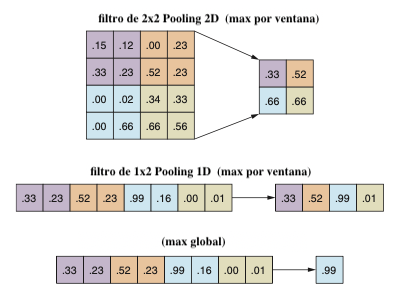

En `Keras` podemos hacer pooling utilizando el valor promedio o el máximo ya sea de por ventana o global. La intuición no dice que al tomar el promedio del subconjunto de valores, en teoría, se retendría la mayor cantidad información. Mientras que al utilizar max pooling, estaríamos tomando la característica más destacada de la región. 

Además el **max** pooling presenta invariancia de ubicación. Es decir, si un elemento de entrada original se desplaza ligeramente en su posición en una muestra de entrada similar pero distinta, la capa de agrupación máxima todavía producirá una salida similar. Esta ultimás característica  es una gran ayuda en el mundo del reconocimiento de imágenes y para el procesamiento del lenguaje natural.
En el ejemplo usaremos una capa con un pooling global máximo **GlobalMaxPooling1D**. Note usar que al máximo global resulta en mayor perdida de información, pero también mayor reducción de dimensión.

In [ ]:
#Agregmos la capa de pooling al modelo https://keras.io/api/layers/pooling_layers/
modelo.add(GlobalMaxPooling1D())

In [ ]:
modelo.summary()

En la siguente imagen sumarizamos todos los elementos que se tenemos en la arquitectura: para cada documento aplicaremos un filtro, se realizará la convolución sobre toda la matriz de entrada. Esto para cada uno de los filtros (en nuestro caso 250). Y la salida la pasaremos a una capa de de max pooling. Con esto tendremos una salida con un solo valor por cada filtro ($1 \times 250$).

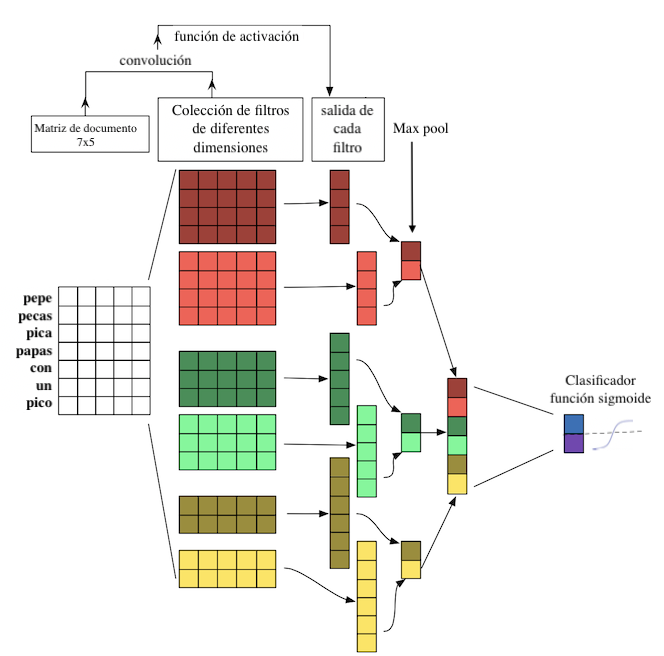

A la sailda del max pooling tendremos  un vector 1D que en teoría la red considera una buena representación de la entrada. La salida es representación semántica de la entrada. Aún cuando es semántica solo el contexto del objetivo de entrenamiento (clasificación o regresión), en este caso solo en el contexto del sentido del humor en cada tweet. No se aprende del contenido del texto sino solo de is un chiste o no.

En este punto solo hemos instanciado el modelo, es decir aún no se ha entrenado, y todos los pesos presenten son solo un montón de números aleatorios. Pero una vez entreanada, la red nos proporicionara una representación vectorial a la que podríamos denominar `vectores de pensamiento`.  Al igual que las diversas representaciones vectoriales ya revisadas, sobre estos nuevos vectores, también puedemos realizar operaciones matemáticas con ello, con la ventja de que ahora se tiene un vector que representa agrupaciones completas de palabras.

El resultado de la salida del maxpool ahora se pasa a una red de feedforward tradicioal (en keras es una capa densa). Para la capa densa **Dense** definiremos el número de nodos (hidden_dims) en 250.

In [ ]:
hidden_dims=250
modelo.add(Dense(250))

In [ ]:
modelo.summary()

#### Dropout

 Es una técnica que permite prevenir el sobreajuste en las redes neuronales. La idea es  que en cada pasada se desactive porcentaje de la entrada que va a la siguiente capa. El porcentaje es  elegido al azar para cada pasada, esto reduce la probabilidad de `sobre aprendizaje`, en cambio, favorecera el aprendizaje de los patrones presentes en los datos y, con ello se obtendrá un modelo con mejores capacidades de generalización.
 
En Keras el dropout es modeladoa como una capa, por que se agrega al  modelo implementa el **dropout**. Esta capa es la responsable de selecciora que entradas apagar en cada pasada de los datos. Note que los pesos de las neuronas que recibirían la entrada cero debido al dropout también serán 0. Por lo tanto, esos pesos no se actualizarán durante  la propagación hacia atrás. Por tanto, la red es obligada a depender de las relaciones entre los distintos grupos de peso para maximizar el aprendizaje. 

A la capa de *dropout** le pasamos el porcentaje de  de los datos que se utilizarán durante la etapa de entrenamiento.  Una configuración donde se descarta el 20% de los datos es común, pero un **dropout** de hasta el 50% puede tener buenos resultados. También especificamos las una función de activación para cada neurona de salida, es el ejemplo usaremos una función **ReLU**

In [ ]:
modelo.add(Dropout(0.2))
modelo.add(Activation('relu')) #https://keras.io/api/layers/activations/

In [ ]:
modelo.summary()

#### Objetivo

La última capa, o capa de salida, estará definida por la función objetivo (clasificador, regresor) real, en nuesto ejemplo utilizaremos una función sigmoide para la tarea de clasificación. La función sigmoide; da un valor entre 0 y 1. Durante la validación, Keras clasificara como 0 a todo lo que este por debajo del umbral de 0.5 y lo que este por encima de ese umbral como 1. Pero en términos de la pérdida, se utiliza el valor real  objetivo menos el valor real como $y-f(x)$. 

In [ ]:
modelo.add(Dense(1))
modelo.add(Activation('sigmoid'))

In [ ]:
modelo.summary()

Con lo anterior ya definimos la arquitectura de la red, ahora debemos entrenar el modedo. Es decir, haremos el proceso de optimización de los pesos.

### Optimización del modelo

El objetivo es minimizar el error en $y - f (x)$ en la capa de sealidasería un vector. Para ello la red neuronal minimoza una función de perdida. El problema del ejemplo estamos tratando con un problema de clasificación binaria (chiste/no-chiste), por lo que usaremos como función de pérdida `binary_crossentropy` (https://keras.io/api/losses/). Las más comumente utilizados en problemas de clasificación son `binary_crossentropy` y `categorical_crossentropy`.

El optimizador ajusta dinámicamente los parámetros del entrenamiento, específicamente la tasa de aprendizaje, esto a partir del estado actual. Por ejemplo, la tasa de aprendizaje puede disminuir con el tiempo.  Cada optimizador tiene su propios hiperparámetros. El conjunto de valores predeterminados para Keras por lo general funcionan bien, por lo que no debería tener que preocuparse demasiado por ellos. 

En Keras se cuenta optimizadores como descenso de gradiente estocástico (SGD), Adam y RSMProp (https://keras.io/api/optimizers/). Los optimizadores en sí son enfoques diferentes para minimizar la función de pérdida en una red neuronal; usualmente debería probar diferentes alternativas para cada problema. Aunque muchos pueden converger para un problema dado, algunos pueden no hacerlo, y lo harán a diferentes ritmos.


#### Construir y entrenar 

Utilizando **compile** inicializamos/cosntruirmos el modelo, con el metodo  **fit** hacemos el entrenamiento (igual que en `sklearn`). Dependiendo del hardware, el tamaño del modelo y la cantidad de datos, la fase entrenamiento llevar desde unos pocos segundos hasta meses. El uso de GPU puede reducir enormemente el tiempo de entrenamiento en la mayoría de los casos. Se requieren algunos pasos adicionales para pasar variables del entorno a Keras para indicarle que use la GPU, pero este ejemplo es lo suficientemente pequeño como para ejecutarlo en la mayoría de las CPU modernas en un período de tiempo razonable.

In [ ]:
modelo.compile(loss='binary_crossentropy',optimizer='RMSprop',metrics=['accuracy'])

In [ ]:
np.random.seed(100)
modelo.fit(train,y_train, epochs=8,batch_size=batch_size,
          validation_data=(test,y_test))

Resumiendo, lo que acabamos de hacer es construir un modelo y optimizarlos.  El proceo  toma los datos de entrada, luego lo pasa por la capa convolucional y hasta la red densa para obtener la función de salida, para después propagando hacia atrás el error encontrado en cada ejemplo hasta el final de la cadena.

Al final de cada epóca se reporta el valor de la pérdida `binary_crossentropy` así como el valos de la métrica, para los conjuntos de entrenamiento y prueba. Recuerde que la  métrica de accuracy puede resultar engañosa para conjuntos de datos desblanceados (puede consultar la lista de métricas disponibles https://keras.io/api/metrics/).

Las muestras de validación nunca se muestran a la red para entrenamiento; solo se utilizan para evaluar el desempeño del modelo. La propagación hacia atrás no ocurre para estas muestras. Esto ayuda a realizar un seguimiento de qué tan bien se generalizará el modelo a datos novedosos del mundo real. Podemos salvar el modelo para usuarlo después

In [ ]:
modelo.save('mi_primer_cnn.h5')

### Predecir utilizando el modelo

Una con el modelo entrenado, se puede utilizar para predecir entradas nuevas. Primero probaremos con dos tweets (uno de cada clase) para recordar todo el proceso completo

In [ ]:
sample_df=train_df.iloc[[1,6]]
sample_df

In [ ]:
sample=vectorize_dataset(sample_df)#primero vectorizamos
samplel=pad_trunc_seq(sample, maxlen=maxlen) # completamos/truncamos
samplev=np.reshape(samplel,(len(samplel),maxlen, embedding_dims))#formamos el tensor de entrada

In [ ]:
# predecimos
modelo.predict(samplev)

El método de **predict** da la salida sin procesar de la capa final de la red. En este caso, el valor de la sigmoide, es decir valor entre 0 y 1. Podemos predecir la clase como sigue:

In [ ]:
#predecimos la clase
[0.5<v and 1 or 0 for v in modelo.predict(samplev)]

Si se tiene un problema de clasificación multiclase, probablement la última capa en su red debeerá ser utilizar una función de activación **softmax**, y las salidas de cada nodo serán la probabilidad  de que cada salidad sea la respuesta correcta. En ese caso la predicción será la salida  con la probabilidad de mayor valor.

Finalmente podemos predecir todo el conjunto de validacion `val` como sigue

In [ ]:
yp=[0.5<v and 1 or 0 for v in modelo.predict(val)]

### Un ejemplo multiclase

Ahora utilizaremos los datos para el EmoEval donder se tienen que clasificar diferentes 7 diferentes emociones `{'anger', 'disgust', 'fear', 'joy', 'others', 'sadness', 'surprise'}`. En este caso usaremos `TweetTokenizer` que ya viene como parte de `ntlk`

In [ ]:
from nltk.tokenize import TweetTokenizer
train_emo_df=pd.read_csv('data/train_emo.tsv',sep='\t')
dev_emo_df=pd.read_csv('data/dev_emo.tsv',sep='\t') 

In [ ]:
set(dev_emo_df.emotion)

In [ ]:
# obtener los vectores
# truncar y completar
# construir modelo
# entrenar
# predecir (la capa se salida debera ser una softmax con tantas neuronas de salida como clases)

### Un ejemplo multicanal